<a href="https://colab.research.google.com/github/MohamedAbdElwahabOka/Investigating-the-performance-of-a-CNN-model-for-Plant-Species-Classification-using-Plant-Leaves/blob/main/Investigating_the_performance_of_a_CNN_model_for_Plant_Species_Classification_using_Plant_Leaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
from PIL import Image
import glob
import os

def load_images(root_folder, folder_names, target_size=(128, 128)):
    images = []
    labels = []

    for label_counter, folder_name in enumerate(folder_names):
        folder_path = os.path.join(root_folder, folder_name)

        if not os.path.isdir(folder_path):
            continue

        image_paths = glob.glob(os.path.join(folder_path, '*.jpg')) + glob.glob(os.path.join(folder_path, '*.png'))

        for img_path in sorted(image_paths):
            with Image.open(img_path) as img:
                img = img.resize(target_size)
                img_array = np.array(img)
                images.append(img_array)
                labels.append(label_counter)

    return np.array(images), np.array(labels)


In [4]:
train_data = '/content/drive/MyDrive/Deep Learning/paper/MalayaKew Plant Leaf Dataset/MK/D1/train'
test_data = '/content/drive/MyDrive/Deep Learning/paper/MalayaKew Plant Leaf Dataset/MK/D1/test'

In [5]:
selected_folders14  = ['Class (1)', 'Class (4)']
selected_folders226 = ['Class (2)', 'Class (26)']

**Load Data For 1&4 classes**

In [6]:
X_train14, y_train14 = load_images(train_data, selected_folders14)
X_test14, y_test14 = load_images(test_data, selected_folders14)

**Load Data For 2&26 classes**

In [7]:
X_train226, y_train226 = load_images(train_data, selected_folders226)
X_test226, y_test226 = load_images(test_data, selected_folders226)

In [8]:
print("X_train14", X_train14.shape)
print("y_train14", y_train14.shape)
print("X_test14", X_test14.shape)
print("y_test14", y_test14.shape)

X_train14 (104, 128, 128, 3)
y_train14 (104,)
X_test14 (24, 128, 128, 3)
y_test14 (24,)


In [9]:
print("X_train226", X_train226.shape)
print("y_train226", y_train226.shape)
print("X_test226", X_test226.shape)
print("y_test226", y_test226.shape)

X_train226 (104, 128, 128, 3)
y_train226 (104,)
X_test226 (24, 128, 128, 3)
y_test226 (24,)


In [10]:
y_train14 = np.array(y_train14)
X_train14 = np.array(X_train14)
y_test14 = np.array(y_test14)
X_test14 = np.array(X_test14)
y_train226 = np.array(y_train226)
X_train226 = np.array(X_train226)
y_test226 = np.array(y_test226)
X_test226 = np.array(X_test226)

# **Normalize Data**

In [11]:
X_train14=X_train14.astype('float32')/255.0
X_test14=X_test14.astype('float32')/255.0

X_train226=X_train226.astype('float32')/255.0
X_test226=X_test226.astype('float32')/255.0

# **Data augmentation**

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator as DataGenerator

data_augmentor = DataGenerator(
    # Define augmentation parameters
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='constant'
)

def apply_augmentation(data):
    augmented_images = []
    for image_data in data:
        expanded_image = np.expand_dims(image_data, axis=0)
        for _ in range(8):
            for batch_data in data_augmentor.flow(expanded_image, batch_size=1, seed=np.random.randint(0, 3000)):
                augmented_images.append(np.squeeze(batch_data))
                break
    return np.array(augmented_images)


In [13]:
X_train14_augmented = apply_augmentation(X_train14)
y_train14_augmented = np.repeat(y_train14,8, axis=0)
X_test14_augmented = apply_augmentation(X_test14)
y_test14_augmented = np.repeat(y_test14,8, axis=0)

In [14]:
print("X_train14_augmented", X_train14_augmented.shape)
print("y_train14_augmented", y_train14_augmented.shape)
print("X_test14_augmented", X_test14_augmented.shape)
print("y_test14_augmented", y_test14_augmented.shape)

X_train14_augmented (832, 128, 128, 3)
y_train14_augmented (832,)
X_test14_augmented (192, 128, 128, 3)
y_test14_augmented (192,)


In [15]:
X_train226_augmented = apply_augmentation(X_train226)
y_train226_augmented = np.repeat(y_train226,8, axis=0)
X_test226_augmented = apply_augmentation(X_test226)
y_test226_augmented = np.repeat(y_test226,8, axis=0)

In [16]:
print("X_train226_augmented", X_train226_augmented.shape)
print("y_train226_augmented", y_train226_augmented.shape)
print("X_test226_augmented", X_test226_augmented.shape)
print("y_test226_augmented", y_test226_augmented.shape)

X_train226_augmented (832, 128, 128, 3)
y_train226_augmented (832,)
X_test226_augmented (192, 128, 128, 3)
y_test226_augmented (192,)


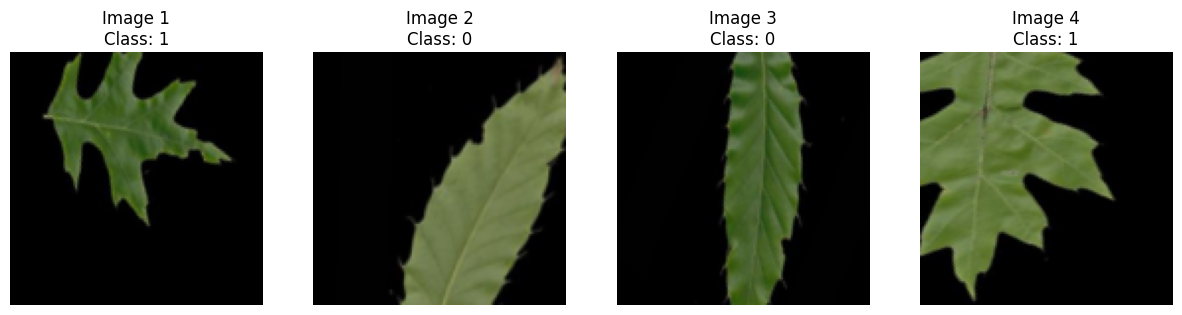

In [18]:
import matplotlib.pyplot as plt
import numpy as np


indices = np.random.randint(0, len(X_train14_augmented), 4)
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i, index in enumerate(indices):
    axes[i].imshow(X_train14_augmented[index])
    axes[i].axis('off')
    class_label = y_train14_augmented[index]
    axes[i].set_title(f"Image {i+1}\nClass: {class_label}")

plt.show()


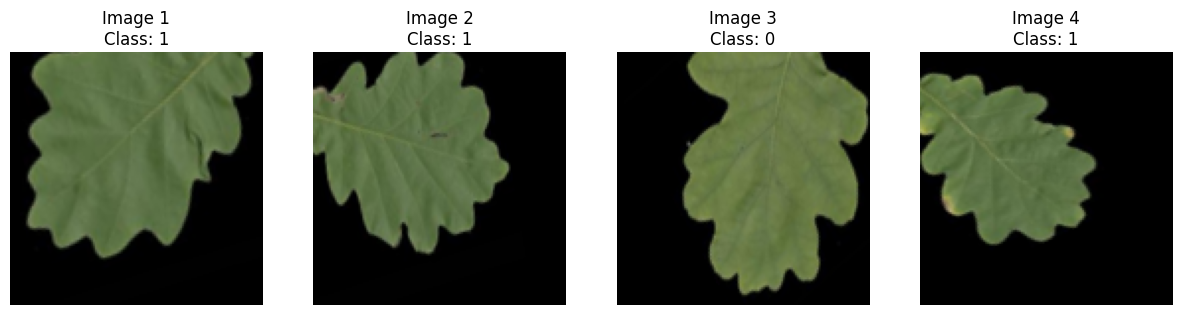

In [19]:
import matplotlib.pyplot as plt
import numpy as np

indices = np.random.randint(0, len(X_train226_augmented), 4)
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i, index in enumerate(indices):
    axes[i].imshow(X_train226_augmented[index])
    axes[i].axis('off')
    class_label = y_train226_augmented[index]
    axes[i].set_title(f"Image {i+1}\nClass: {class_label}")

plt.show()


In [20]:
import matplotlib.pyplot as plt
import numpy as np

def plot_class_distribution(x_train, y_train):
    class_counts = np.bincount(y_train)

    plt.figure(figsize=(2, 3))
    bars = plt.bar(np.unique(y_train), class_counts, alpha=0.7, color=['blue', 'orange'])

    for bar, count in zip(bars, class_counts):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
                 ha='center', va='bottom', fontsize=8)

    plt.xlabel('Class Labels')
    plt.ylabel('Frequency')
    plt.title('Distribution of Classes 0 and 1')
    plt.xticks(np.unique(y_train), ['Class 0', 'Class 1'])

    plt.show()

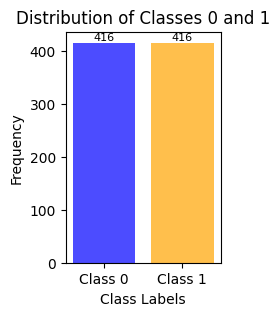

In [21]:
plot_class_distribution(X_train14_augmented,y_train14_augmented)

In [22]:
from sklearn.utils import shuffle as data_shuffle

def combine_and_shuffle(data1, labels1, data2, labels2):
    combined_data = np.concatenate((data1, data2))
    combined_labels = np.concatenate((labels1, labels2))

    # Shuffle the combined data
    combined_data, combined_labels = data_shuffle(combined_data, combined_labels, random_state=42)
    return combined_data, combined_labels

# Replace X_train14, X_train14_augmented, y_train14, y_train14_augmented, etc., with your actual data
new_X_train14, new_y_train14 = combine_and_shuffle(X_train14, y_train14, X_train14_augmented, y_train14_augmented)
new_X_test14, new_y_test14 = combine_and_shuffle(X_test14, y_test14, X_test14_augmented, y_test14_augmented)


In [23]:
print("X_train14_combined", new_X_train14.shape)
print("y_train14_combined", new_y_train14.shape)
print("X_test14_combined", new_X_test14.shape)
print("y_test14_combined", new_y_test14.shape)

X_train14_combined (936, 128, 128, 3)
y_train14_combined (936,)
X_test14_combined (216, 128, 128, 3)
y_test14_combined (216,)


In [24]:
new_X_train226, new_y_train226 = combine_and_shuffle(X_train226, y_train226, X_train226_augmented, y_train226_augmented)
new_X_test226, new_y_test226 = combine_and_shuffle(X_test226, y_test226, X_test226_augmented, y_test226_augmented)

In [25]:
print("X_train226_combined", new_X_train226.shape)
print("y_train226_combined", new_y_train226.shape)
print("X_test226_combined", new_X_test226.shape)
print("y_test226_combined", new_y_test226.shape)

X_train226_combined (936, 128, 128, 3)
y_train226_combined (936,)
X_test226_combined (216, 128, 128, 3)
y_test226_combined (216,)


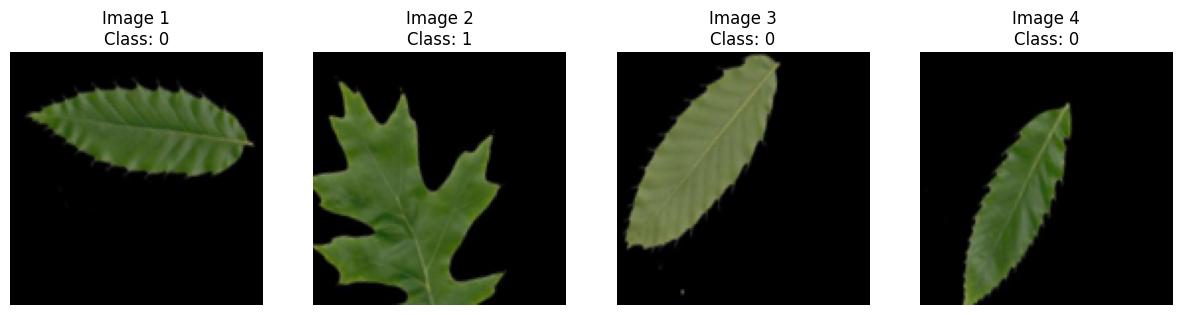

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train14_augmented is a numpy array containing image data
# Assuming y_train14_augmented is a list or array containing the class labels for each image

# Get four random indices
indices = np.random.randint(0, len(X_train14_augmented), 4)

# Display four random images along with their classes
fig, axes = plt.subplots(1, 4, figsize=(15, 5))  # Adjust the figure size as needed

for i, index in enumerate(indices):
    axes[i].imshow(X_train14_augmented[index])
    axes[i].axis('off')  # Turn off axis labels
    class_label = y_train14_augmented[index]  # Get the class label for the current image
    axes[i].set_title(f"Image {i+1}\nClass: {class_label}")

plt.show()


#**MobileNet Model**

In [117]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import regularizers

def MobileNet_model(hp):
    # Load pre-trained MobileNet model
    base = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

    # Freeze the layers of the pre-trained MobileNet except the last three layers
    for layer in base.layers[:-3]:
        layer.trainable = False

    for layer in base.layers[-3:]:
        layer.trainable = True

    MobileNet_model = keras.Sequential()

    # Add the pre-trained MobileNet model
    MobileNet_model.add(base)

    # Flatten the output of MobileNet
    MobileNet_model.add(keras.layers.GlobalAveragePooling2D())

    hp_units1 = hp.Int('units1', min_value=32, max_value=512, step=32)
    hp_units2 = hp.Int('units2', min_value=32, max_value=256, step=32)
    hp_units3 = hp.Int('units3', min_value=32, max_value=128, step=16)

    MobileNet_model.add(layers.Dense(units=hp_units1, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    MobileNet_model.add(layers.Dropout(0.5))
    MobileNet_model.add(layers.Dense(units=hp_units1, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    MobileNet_model.add(layers.Dropout(0.4))
    MobileNet_model.add(layers.Dense(units=hp_units2, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    MobileNet_model.add(layers.Dropout(0.3))
    MobileNet_model.add(layers.Dense(units=hp_units2, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    MobileNet_model.add(layers.Dropout(0.5))
    MobileNet_model.add(layers.Dense(units=hp_units2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    MobileNet_model.add(layers.Dropout(0.5))
    MobileNet_model.add(layers.Dense(units=hp_units3, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

    # Output layer
    MobileNet_model.add(layers.Dense(1, activation='sigmoid'))

    # Hyperparameter for learning rate
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])



    # Compile the model
    MobileNet_model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                         loss='binary_crossentropy',
                         metrics=[
        'accuracy',
        tf.keras.metrics.AUC(),
        tf.keras.metrics.Recall(),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.FalseNegatives(),
        tf.keras.metrics.FalsePositives(),
        tf.keras.metrics.TrueNegatives(),
        tf.keras.metrics.TruePositives(),
        tf.keras.metrics.F1Score()])

    return MobileNet_model


In [106]:
!pip install -U keras-tuner

In [118]:
import kerastuner as kt
objective = kt.Objective(
name="val_accuracy",
direction="max")

tuner=kt.Hyperband(MobileNet_model,
                  objective=objective,
                  max_epochs=10,
                  factor=3,
                  directory='/content/drive/MyDrive/Deep Learning/paper/modelssf/my_dir10',
                  project_name='Hyperband_MobileNet_model')

# **Tuner Search for class 1 and 4**

In [119]:
import tensorflow as tf
from tensorflow.keras import callbacks
from IPython.display import clear_output

class ClearTrainingOutput(callbacks.Callback):
    def on_train_end(self, *args, **kwargs):
        clear_output(wait=True)

In [120]:
tuner.search(new_X_train14,new_y_train14.astype('float32'),epochs=10,validation_split=0.2,callbacks=[ClearTrainingOutput()])
best_hyperparameters14=tuner.get_best_hyperparameters(num_trials=1)[0]
MobileNet_model14 =tuner.hypermodel.build(best_hyperparameters14)
tuner.search_space_summary()

Trial 30 Complete [00h 00m 18s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 07m 27s
Search space summary
Default search space size: 4
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


# **Tuner Search for class 2 and 26**

In [121]:
tuner.search(new_X_train226,new_y_train226.astype('float32'),epochs=10,validation_split=0.2,callbacks=[ClearTrainingOutput()])
best_hyperparameters226=tuner.get_best_hyperparameters(num_trials=1)[0]
MobileNet_model226 =tuner.hypermodel.build(best_hyperparameters226)
tuner.search_space_summary()

Search space summary
Default search space size: 4
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 128, 'step': 16, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


# **Fit for Class 1 and 4**

In [122]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Deep Learning/paper/modelss/XCeption14.h5',save_best_only=True),
    tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',patience=4
    )
]

history14=MobileNet_model14.fit(new_X_train14,new_y_train14.astype('float32'),epochs=50,validation_split=0.2,callbacks=callbacks)

Epoch 1/50
24/24 [==============================] - ETA: 0s - loss: 8.5447 - accuracy: 0.7447 - auc_1: 0.8095 - recall_1: 0.7769 - precision_1: 0.7280 - false_negatives_1: 83.0000 - false_positives_1: 108.0000 - true_negatives_1: 268.0000 - true_positives_1: 289.0000 - f1_score: 0.6902

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 [==============================] - 6s 87ms/step - loss: 8.5447 - accuracy: 0.7447 - auc_1: 0.8095 - recall_1: 0.7769 - precision_1: 0.7280 - false_negatives_1: 83.0000 - false_positives_1: 108.0000 - true_negatives_1: 268.0000 - true_positives_1: 289.0000 - f1_score: 0.6902 - val_loss: 4.9915 - val_accuracy: 1.0000 - val_auc_1: 1.0000 - val_recall_1: 1.0000 - val_precision_1: 1.0000 - val_false_negatives_1: 0.0000e+00 - val_false_positives_1: 0.0000e+00 - val_true_negatives_1: 92.0000 - val_true_positives_1: 96.0000 - val_f1_score: 1.0000
Epoch 2/50
24/24 [==============================] - 1s 41ms/step - loss: 3.7477 - accuracy: 0.9880 - auc_1: 0.9955 - recall_1: 0.9892 - precision_1: 0.9866 - false_negatives_1: 4.0000 - false_positives_1: 5.0000 - true_negatives_1: 371.0000 - true_positives_1: 368.0000 - f1_score: 0.8503 - val_loss: 2.8788 - val_accuracy: 1.0000 - val_auc_1: 1.0000 - val_recall_1: 1.0000 - val_precision_1: 1.0000 - val_false_negatives_1: 0.0000e+00 - val_false_p

# **Fit for Class 2 and 26**

In [123]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/Deep Learning/paper/modelss/XCeption226.h5',save_best_only=True),
    tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',patience=4
    )
]

history226=MobileNet_model226.fit(new_X_train226,new_y_train226.astype('float32'),epochs=50,validation_split=0.2,callbacks=callbacks)

Epoch 1/50
24/24 [==============================] - 6s 88ms/step - loss: 8.3981 - accuracy: 0.5120 - auc_2: 0.4878 - recall_2: 0.5403 - precision_2: 0.5089 - false_negatives_2: 171.0000 - false_positives_2: 194.0000 - true_negatives_2: 182.0000 - true_positives_2: 201.0000 - f1_score: 0.6637 - val_loss: 5.1730 - val_accuracy: 0.7287 - val_auc_2: 0.8863 - val_recall_2: 0.9792 - val_precision_2: 0.6573 - val_false_negatives_2: 2.0000 - val_false_positives_2: 49.0000 - val_true_negatives_2: 43.0000 - val_true_positives_2: 94.0000 - val_f1_score: 0.6761
Epoch 2/50
24/24 [==============================] - 5s 219ms/step - loss: 3.8023 - accuracy: 0.7193 - auc_2: 0.8402 - recall_2: 0.6075 - precision_2: 0.7793 - false_negatives_2: 146.0000 - false_positives_2: 64.0000 - true_negatives_2: 312.0000 - true_positives_2: 226.0000 - f1_score: 0.6758 - val_loss: 2.9037 - val_accuracy: 0.6543 - val_auc_2: 0.9781 - val_recall_2: 0.3229 - val_precision_2: 1.0000 - val_false_negatives_2: 65.0000 - val_f

#Training and Validation accuracy model 14

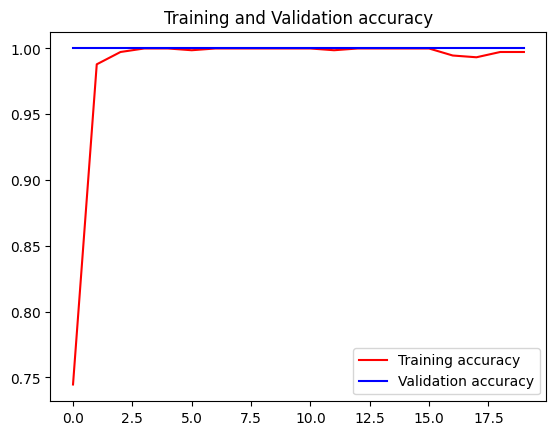

<Figure size 640x480 with 0 Axes>

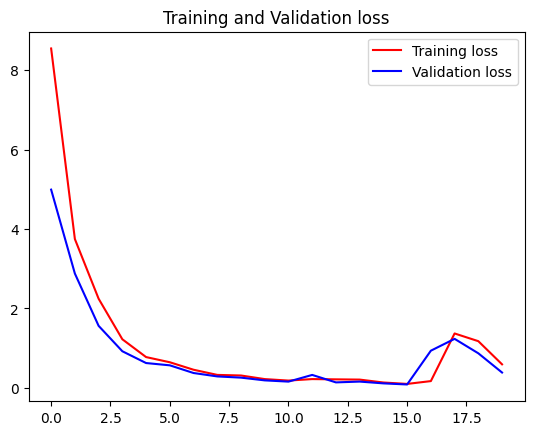

<Figure size 640x480 with 0 Axes>

In [124]:
import matplotlib.pyplot as plt
acc = history14.history['accuracy']
val_acc= history14.history['val_accuracy']
loss = history14.history['loss']
val_loss = history14.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'r',label="Training accuracy")
plt.plot(epochs,val_acc,'b',label="Validation accuracy")
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.title('Training and Validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

#Training and Validation accuracy model 226

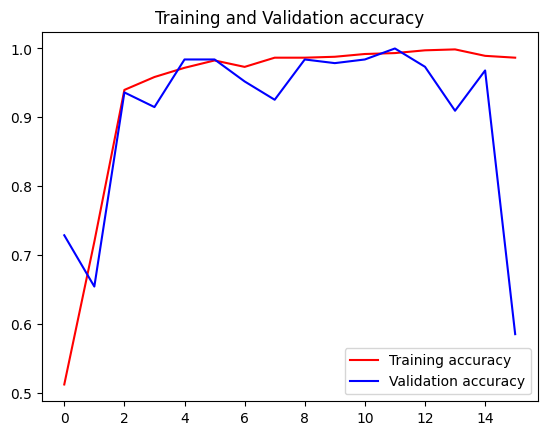

<Figure size 640x480 with 0 Axes>

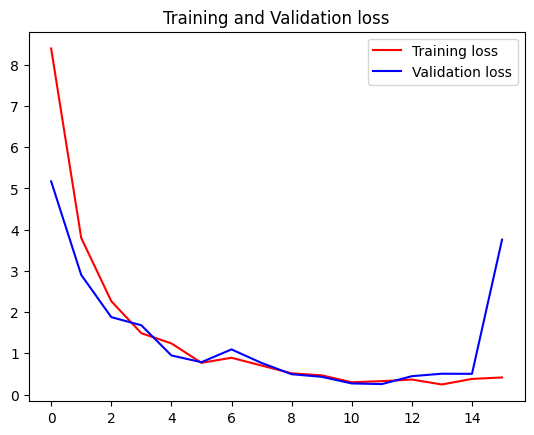

<Figure size 640x480 with 0 Axes>

In [125]:
import matplotlib.pyplot as plt
acc = history226.history['accuracy']
val_acc= history226.history['val_accuracy']
loss = history226.history['loss']
val_loss = history226.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'r',label="Training accuracy")
plt.plot(epochs,val_acc,'b',label="Validation accuracy")
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.title('Training and Validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

#evaluate model 14


In [133]:
MobileNet_model14.evaluate(new_X_test14,new_y_test14.astype('float32'))

#MobileNet_model14.evaluate(X_test14,y_test14.astype('float32'))
#MobileNet_model14.evaluate(X_test14_augmented,y_test14_augmented.astype('float32'))


7/7 [==============================] - 0s 32ms/step - loss: 0.3871 - accuracy: 1.0000 - auc_1: 1.0000 - recall_1: 1.0000 - precision_1: 1.0000 - false_negatives_1: 0.0000e+00 - false_positives_1: 0.0000e+00 - true_negatives_1: 108.0000 - true_positives_1: 108.0000 - f1_score: 0.6667


[0.38706815242767334,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 108.0,
 108.0,
 array([0.6666667], dtype=float32)]

#evaluate model 226


In [130]:
#MobileNet_model226.evaluate(new_X_test14,new_y_test14.astype('float32'))

#MobileNet_model226.evaluate(X_test226,y_test226.astype('float32'))
MobileNet_model226.evaluate(X_test14_augmented,y_test14_augmented.astype('float32'))


6/6 [==============================] - 0s 25ms/step - loss: 13.6703 - accuracy: 0.5000 - auc_2: 0.5000 - recall_2: 0.0000e+00 - precision_2: 0.0000e+00 - false_negatives_2: 96.0000 - false_positives_2: 0.0000e+00 - true_negatives_2: 96.0000 - true_positives_2: 0.0000e+00 - f1_score: 0.2414


[13.670284271240234,
 0.5,
 0.5,
 0.0,
 0.0,
 96.0,
 0.0,
 96.0,
 0.0,
 array([0.2413793], dtype=float32)]